https://www.kaggle.com/sharmasanthosh/exploratory-study-on-ml-algorithms/notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


folder = "D:\\Personal\\Data Science\\Projects\\AllStateClaims\\"

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
plotly.tools.set_credentials_file(username='s2aluru', api_key='AjA20fcLrLV6NNm00Rme')


In [2]:
train = pd.read_csv(folder + "train.csv")
test = pd.read_csv(folder + "test.csv")

In [3]:
train.head(2)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60


In [4]:
train.shape, test.shape

((188318, 132), (125546, 131))

In [5]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [6]:
# drop id column as it doesn't help in analysis
train.drop(['id'], axis = 1, inplace=True)

In [7]:
train.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [8]:
train["cat1"].unique()

array(['A', 'B'], dtype=object)

In [9]:
datacols = train.columns

In [10]:
datacols[0]

'cat1'

In [11]:
#Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [12]:
train.columns[115]

'cat116'

In [13]:
# parameters - 116 category, 14 continous and loss 
n_cat = 116
n_cont = 14

In [14]:
train.skew()

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

In [15]:
datacols

Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
       'cat10',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=131)

data = []

#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7
idx = n_cat

fig = tls.make_subplots(rows=7, cols=2)
for i in range(n_rows):
    for j in range(n_cols):
        idx = idx + 1
        trace = {
            "type": 'violin',
            "y": train[datacols[idx]],
            "name": datacols[idx],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
            }
        fig.append_trace(trace,i+1,j+1)

fig['layout'].update(height=1600, width=800, title='violin plots')
py.iplot(fig,  validate = False)


fig = {
    "data": [{
        "type": 'violin',
        "y": np.log(train['loss']),
        "box": {
            "visible": True
        },
        "line": {
            "color": 'black'
        },
        "meanline": {
            "visible": True
        },
        "fillcolor": '#8dd3c7',
        "opacity": 0.6,
        "x0": 'Loss'
    }],
    "layout" : {
        "title": "",
        "yaxis": {
            "zeroline": False,
        }
    }
}

py.iplot(fig, validate = False)

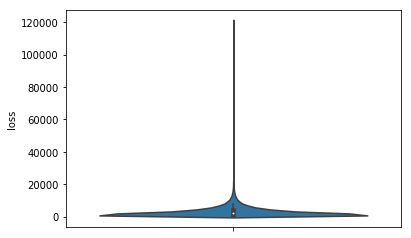

In [17]:
#get the names of all the columns
cols=train.columns 
sns.violinplot(y=cols[len(cols)-1], data=train)
plt.show()

In [18]:
import warnings
warnings.filterwarnings('ignore')

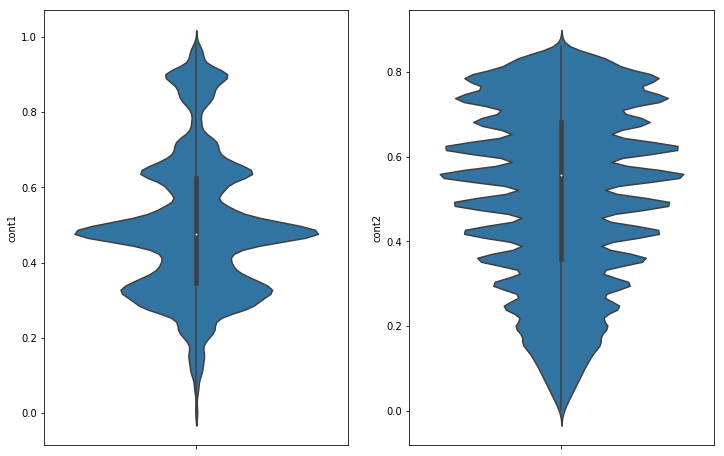

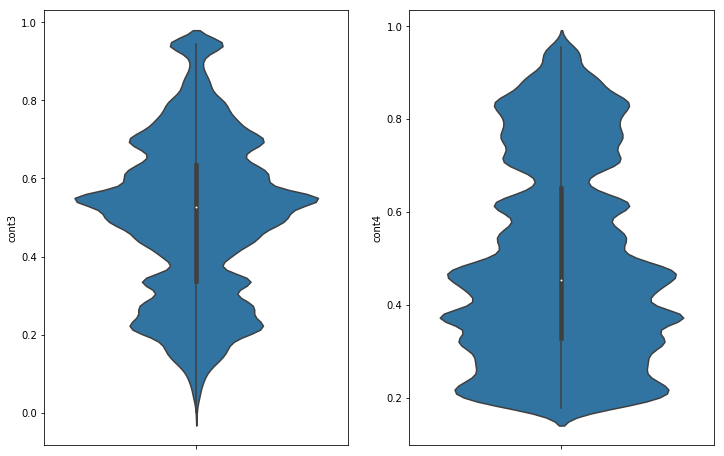

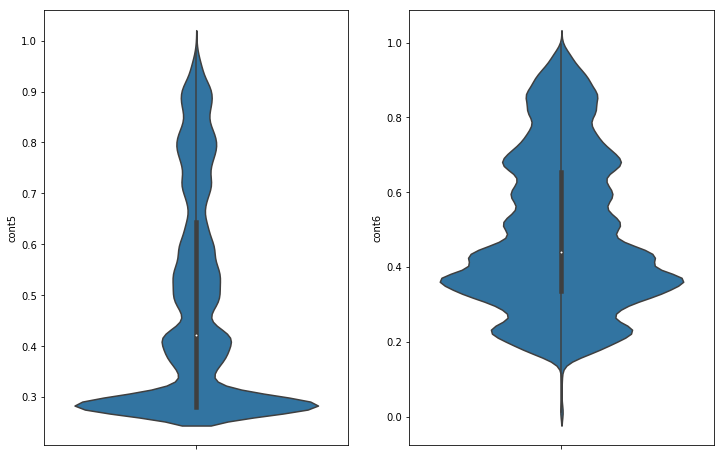

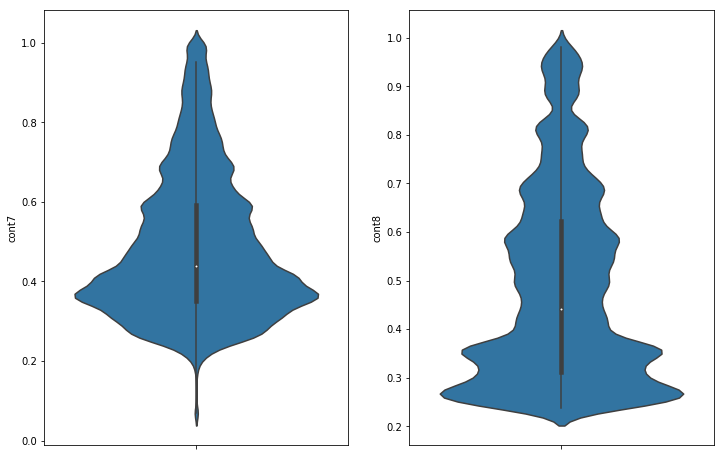

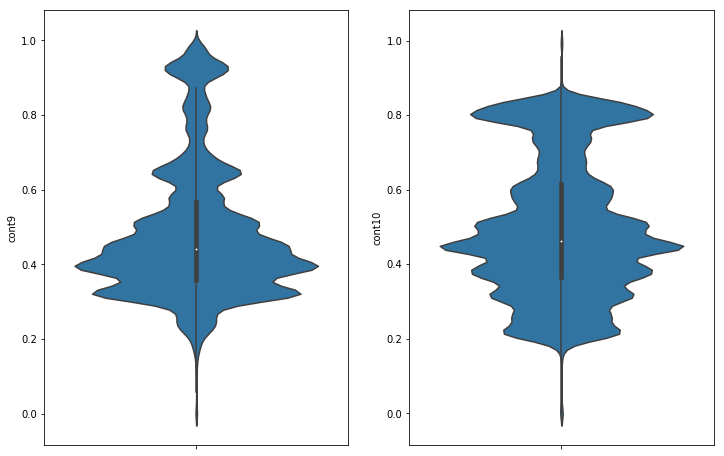

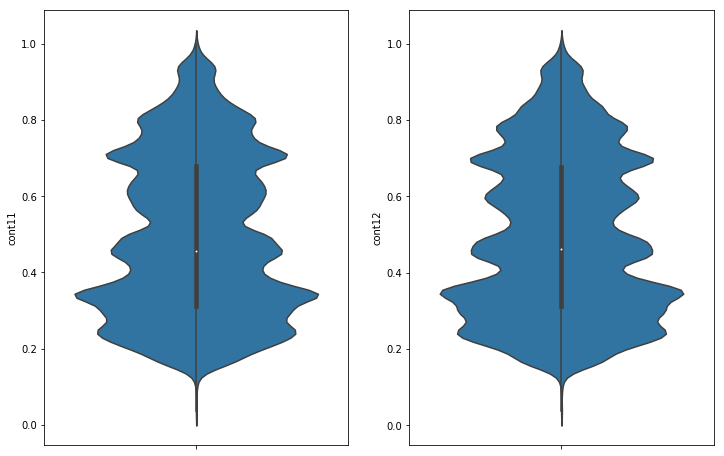

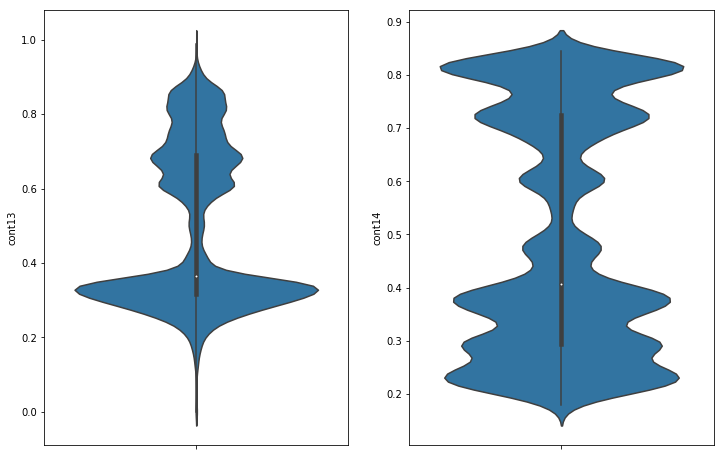

In [20]:
#create a dataframe with only continuous features
data=train.iloc[:,n_cat:] 

#get the names of all the columns
cols=data.columns 

#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=data, ax=ax[j])
plt.show()

In [22]:
from scipy import stats

In [23]:
logloss = np.log(train['loss'])

In [24]:
train['loss'].head(10), logloss.head(10)

(0     2213.18
 1     1283.60
 2     3005.09
 3      939.85
 4     2763.85
 5     5142.87
 6     1132.22
 7     3585.75
 8    10280.20
 9     6184.59
 Name: loss, dtype: float64, 0    7.702186
 1    7.157424
 2    8.008063
 3    6.845720
 4    7.924380
 5    8.545367
 6    7.031936
 7    8.184723
 8    9.237975
 9    8.729816
 Name: loss, dtype: float64)

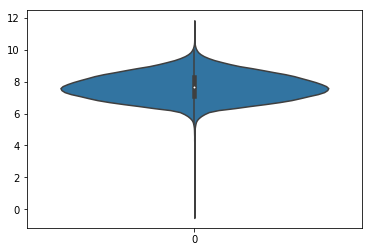

In [25]:
sns.violinplot(data=logloss)
plt.show()

In [26]:
# Correlation tells relation between two attributes.
#range of features considered
split = 116 

#number of features considered
size = 15

# Correlation requires continous data. Hence, ignore categorical data
data=train.iloc[:,split:] 
# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        val = data_corr.iloc[i,j]
        if (val >= threshold and val < 1) or (val < 0 and val <= -threshold):
            corr_list.append([val,i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


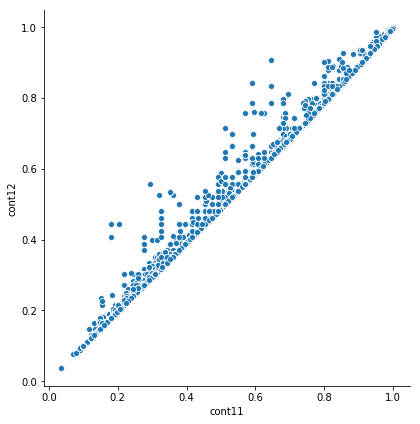

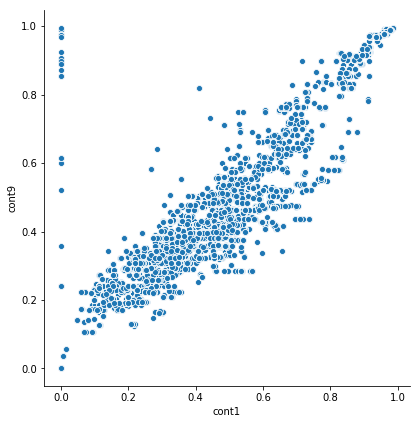

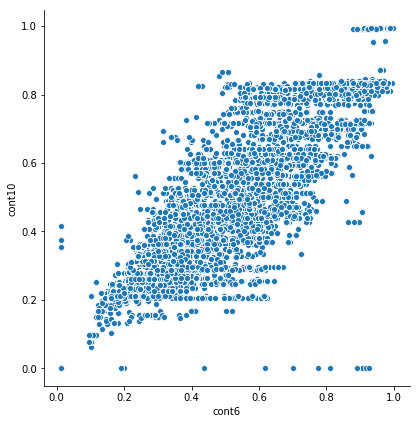

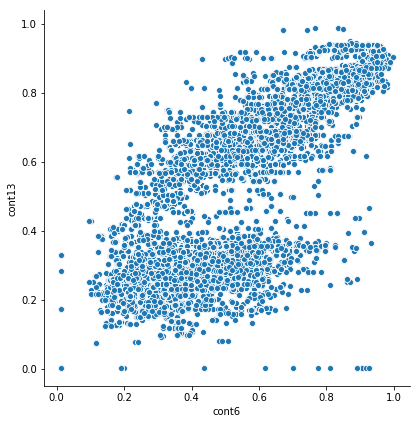

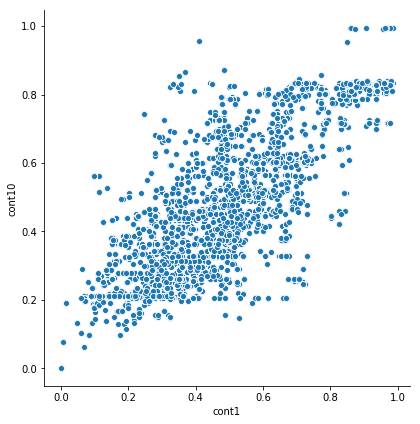

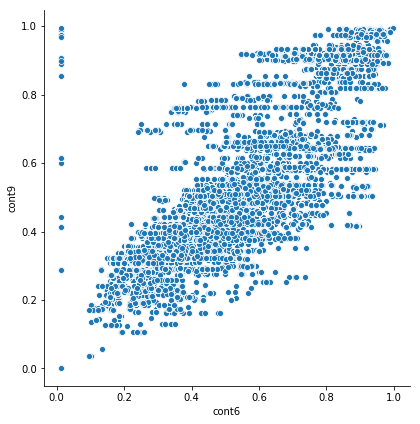

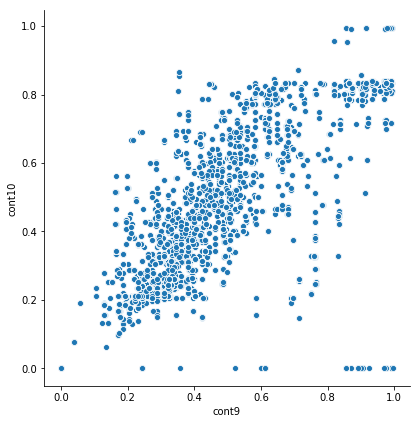

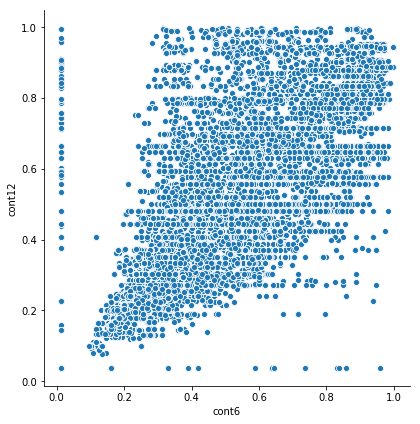

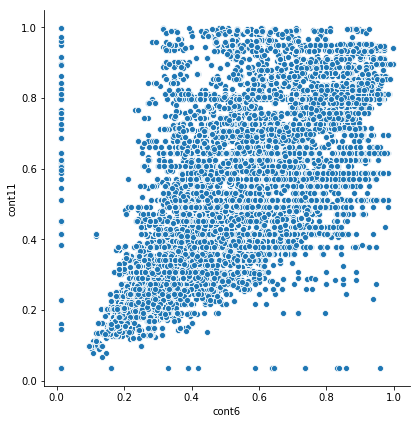

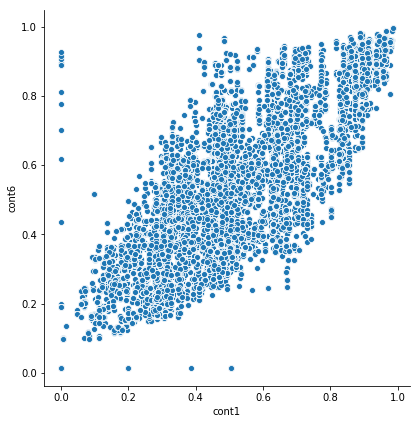

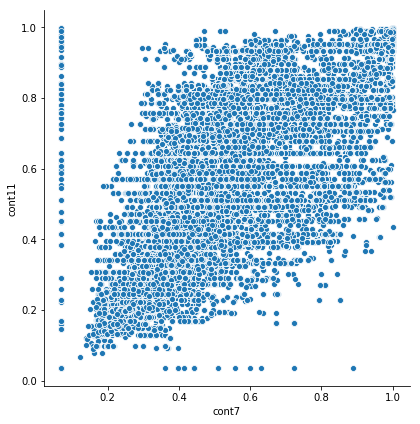

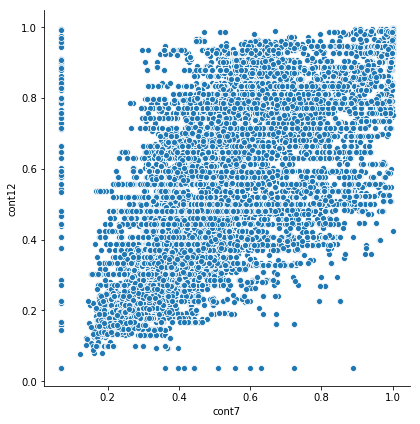

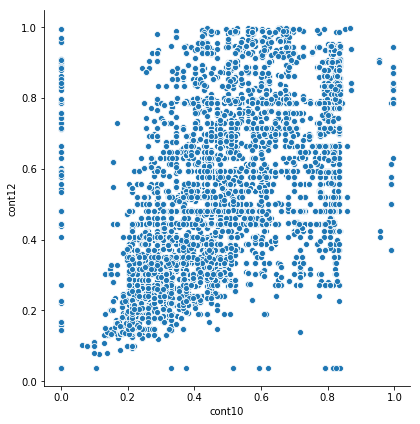

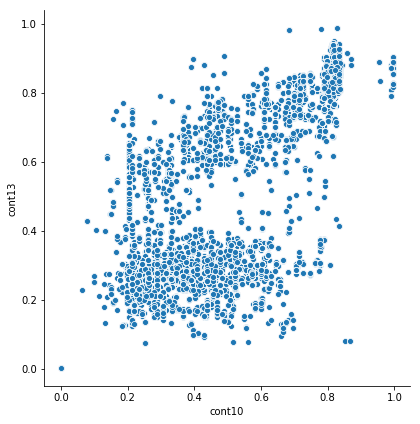

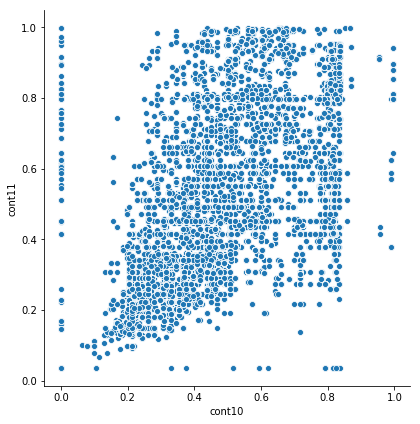

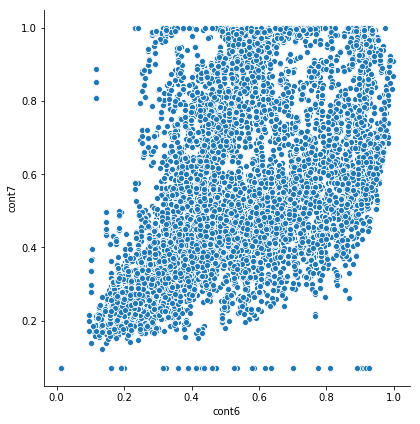

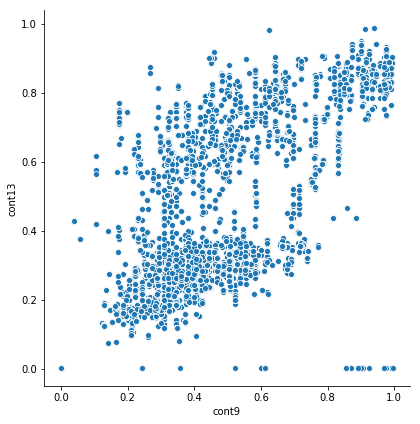

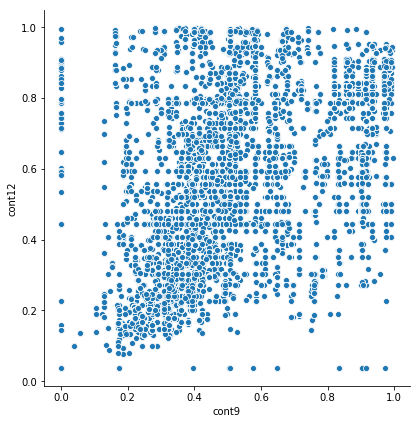

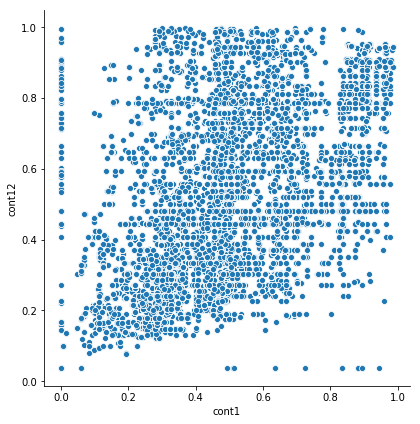

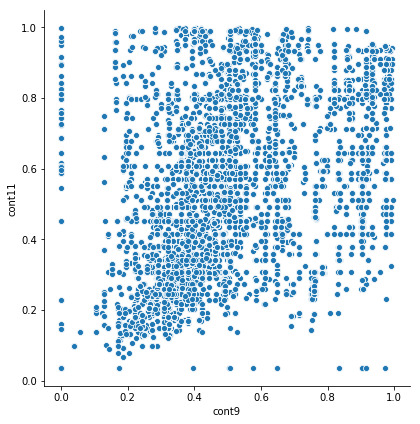

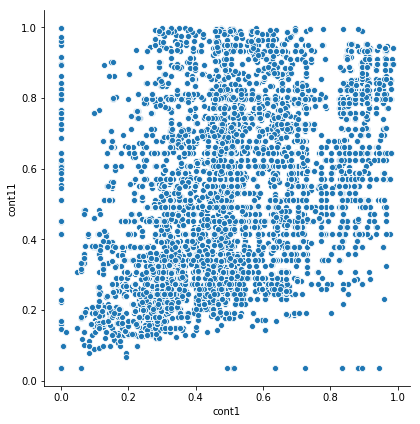

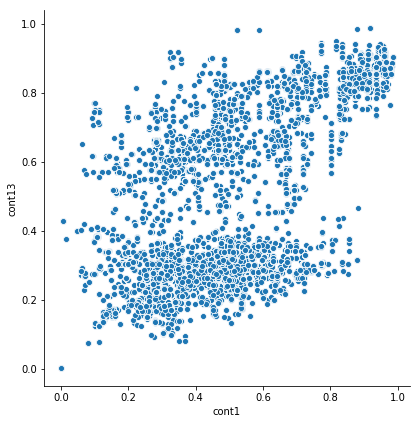

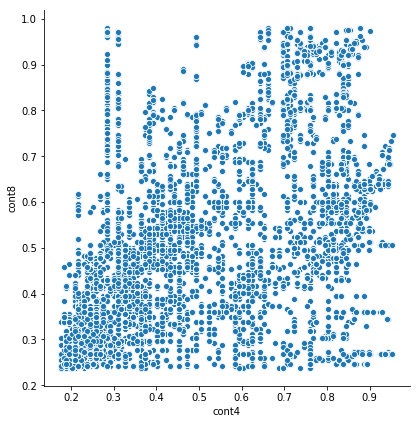

In [27]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(train, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

#cont11 and cont12 give an almost linear pattern...one must be removed
#cont1 and cont9 are highly correlated ...either of them could be safely removed 
#cont6 and cont10 show very good correlation too

In [28]:
# Count of each label in each category

#names of all the columns
cols = train.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train, ax=ax[j])

#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels

KeyboardInterrupt: 

In [29]:
#counts = np.empty([2, 2])
for i in range(n_cat-1):
    print(train[cols[i]].value_counts())

A    141550
B     46768
Name: cat1, dtype: int64
A    106721
B     81597
Name: cat2, dtype: int64
A    177993
B     10325
Name: cat3, dtype: int64
A    128395
B     59923
Name: cat4, dtype: int64
A    123737
B     64581
Name: cat5, dtype: int64
A    131693
B     56625
Name: cat6, dtype: int64
A    183744
B      4574
Name: cat7, dtype: int64
A    177274
B     11044
Name: cat8, dtype: int64
A    113122
B     75196
Name: cat9, dtype: int64
A    160213
B     28105
Name: cat10, dtype: int64
A    168186
B     20132
Name: cat11, dtype: int64
A    159825
B     28493
Name: cat12, dtype: int64
A    168851
B     19467
Name: cat13, dtype: int64
A    186041
B      2277
Name: cat14, dtype: int64
A    188284
B        34
Name: cat15, dtype: int64
A    181843
B      6475
Name: cat16, dtype: int64
A    187009
B      1309
Name: cat17, dtype: int64
A    187331
B       987
Name: cat18, dtype: int64
A    186510
B      1808
Name: cat19, dtype: int64
A    188114
B       204
Name: cat20, dtype: int64
A    1879

Name: cat112, dtype: int64
BM    26191
AE    22030
L     13058
AX    12661
Y     11374
K      7738
S      7033
X      7016
AF     6079
AN     5214
H      5094
AT     4664
AJ     4425
AD     4419
AS     3901
AK     3520
BN     3486
I      3279
A      3269
J      3105
N      2839
BC     2793
Q      2784
BJ     2605
M      2485
AG     2415
AW     1825
BG     1804
AU     1630
AO     1628
F      1463
BO     1413
BH     1221
BK      693
AV      528
AY      466
AM      450
AI      440
BF      347
BD      337
AH      209
C       143
BB       53
BA       42
BI       32
G        18
AB       18
AQ       17
V        15
U        11
O        10
E         7
AP        6
AL        3
BL        3
BE        3
T         2
B         1
AC        1
P         1
AR        1
Name: cat113, dtype: int64
A    131693
C     16793
E     16475
J      8199
F      7905
N      2455
I      2432
R       912
L       870
U       250
O       240
Q        43
V        33
B         6
D         5
S         4
G         1
W         

In [30]:
for i in range(n_cat):
    u = train[cols[i]].unique()
    print(i, len(u), u)

0 2 ['A' 'B']
1 2 ['B' 'A']
2 2 ['A' 'B']
3 2 ['B' 'A']
4 2 ['A' 'B']
5 2 ['A' 'B']
6 2 ['A' 'B']
7 2 ['A' 'B']
8 2 ['B' 'A']
9 2 ['A' 'B']
10 2 ['B' 'A']
11 2 ['A' 'B']
12 2 ['A' 'B']
13 2 ['A' 'B']
14 2 ['A' 'B']
15 2 ['A' 'B']
16 2 ['A' 'B']
17 2 ['A' 'B']
18 2 ['A' 'B']
19 2 ['A' 'B']
20 2 ['A' 'B']
21 2 ['A' 'B']
22 2 ['B' 'A']
23 2 ['A' 'B']
24 2 ['A' 'B']
25 2 ['A' 'B']
26 2 ['A' 'B']
27 2 ['A' 'B']
28 2 ['A' 'B']
29 2 ['A' 'B']
30 2 ['A' 'B']
31 2 ['A' 'B']
32 2 ['A' 'B']
33 2 ['A' 'B']
34 2 ['A' 'B']
35 2 ['A' 'B']
36 2 ['A' 'B']
37 2 ['A' 'B']
38 2 ['A' 'B']
39 2 ['A' 'B']
40 2 ['A' 'B']
41 2 ['A' 'B']
42 2 ['A' 'B']
43 2 ['A' 'B']
44 2 ['A' 'B']
45 2 ['A' 'B']
46 2 ['A' 'B']
47 2 ['A' 'B']
48 2 ['A' 'B']
49 2 ['A' 'B']
50 2 ['A' 'B']
51 2 ['A' 'B']
52 2 ['A' 'B']
53 2 ['A' 'B']
54 2 ['A' 'B']
55 2 ['A' 'B']
56 2 ['A' 'B']
57 2 ['A' 'B']
58 2 ['A' 'B']
59 2 ['A' 'B']
60 2 ['A' 'B']
61 2 ['A' 'B']
62 2 ['A' 'B']
63 2 ['A' 'B']
64 2 ['A' 'B']
65 2 ['A' 'B']
66 2 ['A' 'B']
67 2 

In [31]:
#cat1 to cat116 have strings. The ML algorithms we are going to study require numberical data
#One-hot encoding converts an attribute to a binary vector

#Variable to hold the list of variables for an attribute in the train and test data
labels = []

for i in range(n_cat):
    train_t = train[cols[i]].unique()
    test_t = test[cols[i]].unique()
    labels.append(list(set(train_t) | set(test_t)))    


In [32]:
from sklearn.preprocessing import LabelBinarizer
X = np.empty([train.shape[0],0],dtype=int)
print(X.shape)
for i in range(split):
    onehotencoder = LabelBinarizer()
    t = onehotencoder.fit_transform(train[cols[i]])
    X = np.concatenate((X, t), axis=1)  

(188318, 0)
(188318, 1)
(188318, 2)
(188318, 3)
(188318, 4)
(188318, 5)
(188318, 6)
(188318, 7)
(188318, 8)
(188318, 9)
(188318, 10)
(188318, 11)
(188318, 12)
(188318, 13)
(188318, 14)
(188318, 15)
(188318, 16)
(188318, 17)
(188318, 18)
(188318, 19)
(188318, 20)
(188318, 21)
(188318, 22)
(188318, 23)
(188318, 24)
(188318, 25)
(188318, 26)
(188318, 27)
(188318, 28)
(188318, 29)
(188318, 30)
(188318, 31)
(188318, 32)
(188318, 33)
(188318, 34)
(188318, 35)
(188318, 36)
(188318, 37)
(188318, 38)
(188318, 39)
(188318, 40)
(188318, 41)
(188318, 42)
(188318, 43)
(188318, 44)
(188318, 45)
(188318, 46)
(188318, 47)
(188318, 48)
(188318, 49)
(188318, 50)
(188318, 51)
(188318, 52)
(188318, 53)
(188318, 54)
(188318, 55)
(188318, 56)
(188318, 57)
(188318, 58)
(188318, 59)
(188318, 60)
(188318, 61)
(188318, 62)
(188318, 63)
(188318, 64)
(188318, 65)
(188318, 66)
(188318, 67)
(188318, 68)
(188318, 69)
(188318, 70)
(188318, 71)
(188318, 72)
(188318, 75)
(188318, 78)
(188318, 81)
(188318, 84)
(188318, 

In [35]:
X.shape

(188318, 1067)

In [36]:
encoded_train = np.concatenate((X, train.iloc[:, split:]), axis=1)

In [37]:
encoded_train[-1,:]

array([1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 8.10511e-01,
       7.21460e-01, 4.75172e+03])

In [38]:
#get the number of rows and columns
r, c = encoded_train.shape

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X = encoded_train[:,0:(c-1)]
Y = encoded_train[:,(c-1)]
del encoded_train

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0



In [69]:
#Split the data into chunks
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)
del X
del Y

#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms 
mae = []

#Scoring parameter
from sklearn.metrics import mean_absolute_error

#Add this version of X to the list 
n = "All"
#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])

# Evaluation, prediction, and analysis
## Linear Regression (Linear algo)

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, Y_train)
##Accuracy of the model using all features
for name,i_cols_list in X_all:
    lr.fit(X_train[:,i_cols_list],Y_train)
    result = mean_absolute_error(np.exp(Y_val), np.exp(model.predict(X_val[:,i_cols_list])))
    mae.append(result)
    print(name + " %s" % result)
comb.append(algo)

NameError: name 'numpy' is not defined

In [49]:
lr.coef_, len(lr.coef_), lr.intercept_

(array([-2.39628900e+02, -5.13569789e+14, -7.05102333e+15, ...,
         4.26875000e+02,  4.74843750e+02,  1.01484375e+02]),
 1081,
 3846151740075611.0)

In [54]:
for name,i_cols_list in X_all:
    predict = lr.predict(X_val)
predict, Y_val
result = mean_absolute_error(predict, Y_val)

In [70]:
# Make predictions using XGB as it gave the best estimated performance        
from xgboost import XGBRegressor
X = np.concatenate((X_train,X_val),axis=0)
del X_train
del X_val
Y = np.concatenate((Y_train,Y_val),axis=0)
del Y_train
del Y_val

n_estimators = 1000

#Best model definition
best_model = XGBRegressor(n_estimators=n_estimators,seed=seed)
best_model.fit(X,Y)
del X
del Y
#Read test dataset
dataset_test = pandas.read_csv("../input/test.csv")
#Drop unnecessary columns
ID = dataset_test['id']
dataset_test.drop('id',axis=1,inplace=True)

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_test.iloc[:,i])
    feature = feature.reshape(dataset_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = numpy.column_stack(cats)

del cats

#Concatenate encoded attributes with continuous attributes
X_test = numpy.concatenate((encoded_cats,test.iloc[:,split:].values),axis=1)

del encoded_cats
del dataset_test

#Make predictions using the best model
predictions = numpy.expm1(best_model.predict(X_test))
del X_test
# Write submissions to output file in the correct format
with open("submission.csv", "w") as subfile:
    subfile.write("id,loss\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))

NameError: name 'pandas' is not defined

In [55]:
result

1299.42700722175